In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
news_api = os.environ["NEWS_API"]

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
news_api

'86e29b620d8b4fca820906075fddfdd3'

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api)

In [6]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy")

In [7]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy")

In [8]:
#btc_headlines
#ethereum_headlines

In [9]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []
for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
btc  = pd.DataFrame(sentiments)
btc.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
1,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
2,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
3,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...


In [10]:
# Create the ethereum sentiment scores DataFrame
sentiments = []
for articles in ethereum_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
ethereum  = pd.DataFrame(sentiments)
ethereum.head()

,Compound,Negative,Neutral,Positive,text
0,0.000,0.0,1.00,0.00,Editor’s note:Andreessen HorowitzsCrypto Start...
1,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
2,0.000,0.0,1.00,0.00,Editors note:Andreessen Horowitzs Crypto Start...
3,0.000,0.0,1.00,0.00,For developers looking to quickly build identi...
4,0.000,0.0,1.00,0.00,"Akron, Ohio, the hometown of LeBron James and ..."


In [11]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.310145,0.014100,0.918400,0.067400
std,0.319985,0.036248,0.041378,0.037293
min,-0.346400,0.000000,0.819000,0.000000
25%,0.000000,0.000000,0.910000,0.045000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.507000,0.134000,1.000000,0.090000


In [12]:
# Describe the Ethereum Sentiment
ethereum.describe()

,Compound,Negative,Neutral,Positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.127271,0.027235,0.913765,0.058941
std,0.425577,0.056784,0.093999,0.081450
min,-0.670500,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.882000,0.000000
50%,0.000000,0.000000,0.910000,0.057000
75%,0.507000,0.000000,1.000000,0.090000
max,0.919800,0.184000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Expand the default stopwords list if necessary
stopwords = stopwords.words('english')

In [16]:
# Complete the tokenizer function
import re
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words_list = list(map(lambda word: word.lower(),words))
    
    # Remove the punctuation
    regexp = r'(\W)*'
    clean_list = [re.sub(regexp, "", word) for word in words_list]
    words_list = [item for item in clean_list if item]
    
    # Remove the stop words
    words_list = [word for word in words_list if word not in stopwords]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    
    tokens=([lemmatizer.lemmatize(word) for word in words_list])
    return tokens

In [40]:
btc_text = btc["text"].apply(tokenizer).values[0]
btc_text = ",".join(btc_text)
btc_text

'winklevoss,twinsthe,brother,mark,zuckerberg,allegedly,stole,idea,facebook,fromare,making,movie,deadline,reported,week,doesnt,seem,masturbatory,enough,r,2657,char'

In [17]:
btc["tokens"] = btc["text"].apply(tokenizer)
print(btc)

    Compound  Negative  Neutral  Positive  \
0     0.0000     0.000    1.000     0.000   
1    -0.3464     0.134    0.819     0.046   
2    -0.2755     0.070    0.930     0.000   
3     0.0000     0.000    1.000     0.000   
4     0.5070     0.000    0.910     0.090   
5     0.5070     0.000    0.910     0.090   
6    -0.2732     0.078    0.879     0.042   
7     0.0000     0.000    1.000     0.000   
8     0.5070     0.000    0.910     0.090   
9     0.5070     0.000    0.910     0.090   
10    0.5070     0.000    0.910     0.090   
11    0.5070     0.000    0.910     0.090   
12    0.5070     0.000    0.910     0.090   
13    0.5070     0.000    0.910     0.090   
14    0.5070     0.000    0.910     0.090   
15    0.5070     0.000    0.910     0.090   
16    0.5070     0.000    0.910     0.090   
17    0.5070     0.000    0.910     0.090   
18    0.5070     0.000    0.910     0.090   
19    0.5070     0.000    0.910     0.090   

                                                 text 

In [18]:
# Create a new tokens column for bitcoin
btc["tokens"] = btc["text"].apply(tokenizer)
print(btc)

    Compound  Negative  Neutral  Positive  \
0     0.0000     0.000    1.000     0.000   
1    -0.3464     0.134    0.819     0.046   
2    -0.2755     0.070    0.930     0.000   
3     0.0000     0.000    1.000     0.000   
4     0.5070     0.000    0.910     0.090   
5     0.5070     0.000    0.910     0.090   
6    -0.2732     0.078    0.879     0.042   
7     0.0000     0.000    1.000     0.000   
8     0.5070     0.000    0.910     0.090   
9     0.5070     0.000    0.910     0.090   
10    0.5070     0.000    0.910     0.090   
11    0.5070     0.000    0.910     0.090   
12    0.5070     0.000    0.910     0.090   
13    0.5070     0.000    0.910     0.090   
14    0.5070     0.000    0.910     0.090   
15    0.5070     0.000    0.910     0.090   
16    0.5070     0.000    0.910     0.090   
17    0.5070     0.000    0.910     0.090   
18    0.5070     0.000    0.910     0.090   
19    0.5070     0.000    0.910     0.090   

                                                 text 

In [19]:
# Create a new tokens column for ethereum
ethereum["tokens"] = ethereum["text"].apply(tokenizer)
print(ethereum)

    Compound  Negative  Neutral  Positive  \
0     0.0000     0.000    1.000     0.000   
1     0.5070     0.000    0.910     0.090   
2     0.0000     0.000    1.000     0.000   
3     0.0000     0.000    1.000     0.000   
4     0.0000     0.000    1.000     0.000   
5    -0.4457     0.086    0.882     0.031   
6     0.3400     0.050    0.861     0.089   
7     0.2732     0.000    0.943     0.057   
8    -0.5994     0.184    0.751     0.065   
9    -0.6705     0.143    0.857     0.000   
10    0.5070     0.000    0.910     0.090   
11    0.5070     0.000    0.910     0.090   
12    0.5070     0.000    0.910     0.090   
13    0.9198     0.000    0.665     0.335   
14    0.0000     0.000    1.000     0.000   
15    0.3182     0.000    0.935     0.065   
16    0.0000     0.000    1.000     0.000   

                                                 text  \
0   Editor’s note:Andreessen HorowitzsCrypto Start...   
1   Our robot colleague Satoshi Nakaboto writes ab...   
2   Editors note:A

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('satoshi', 'nakaboto'), 28),
 (('char', 'robot'), 14),
 (('robot', 'colleague'), 14),
 (('colleague', 'satoshi'), 14),
 (('nakaboto', 'writes'), 14),
 (('writes', 'bitcoin'), 14),
 (('every', 'fucking'), 14),
 (('fucking', 'day'), 14),
 (('day', 'welcome'), 14),
 (('welcome', 'another'), 14),
 (('another', 'edition'), 14),
 (('edition', 'bitcoin'), 14),
 (('bitcoin', 'today'), 14),
 (('today', 'satoshi'), 14),
 (('nakaboto', 'tell'), 14),
 (('tell', 'whats'), 14),
 (('whats', 'going'), 14),
 (('going', 'bitcoin'), 14),
 (('bitcoin', 'btc'), 13),
 (('btc', 'every'), 13)]

In [22]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum.text.str.cat()), N)
Counter(grams).most_common(20)

[(('satoshi', 'nakaboto'), 8),
 (('char', 'robot'), 4),
 (('robot', 'colleague'), 4),
 (('colleague', 'satoshi'), 4),
 (('nakaboto', 'writes'), 4),
 (('writes', 'bitcoin'), 4),
 (('bitcoin', 'btc'), 4),
 (('btc', 'every'), 4),
 (('every', 'fucking'), 4),
 (('fucking', 'day'), 4),
 (('day', 'welcome'), 4),
 (('welcome', 'another'), 4),
 (('another', 'edition'), 4),
 (('edition', 'bitcoin'), 4),
 (('bitcoin', 'today'), 4),
 (('today', 'satoshi'), 4),
 (('nakaboto', 'tell'), 4),
 (('tell', 'whats'), 4),
 (('whats', 'going'), 4),
 (('going', 'bitcoin'), 4)]

In [23]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Get the top 10 words for Bitcoin
token_count(tokenizer(btc.text.str.cat()),10)

[('bitcoin', 47),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('char', 20),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14),
 ('day', 14)]

In [25]:
# Get the top 10 words for Ethereum
token_count(tokenizer(ethereum.text.str.cat()),10)

[('char', 17),
 ('bitcoin', 15),
 ('satoshi', 8),
 ('nakaboto', 8),
 ('andreessen', 4),
 ('u', 4),
 ('robot', 4),
 ('colleague', 4),
 ('writes', 4),
 ('btc', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [42]:
btc_text = btc["text"].apply(tokenizer).values[0]
btc_text = ",".join(btc_text)
btc_text

'winklevoss,twinsthe,brother,mark,zuckerberg,allegedly,stole,idea,facebook,fromare,making,movie,deadline,reported,week,doesnt,seem,masturbatory,enough,r,2657,char'

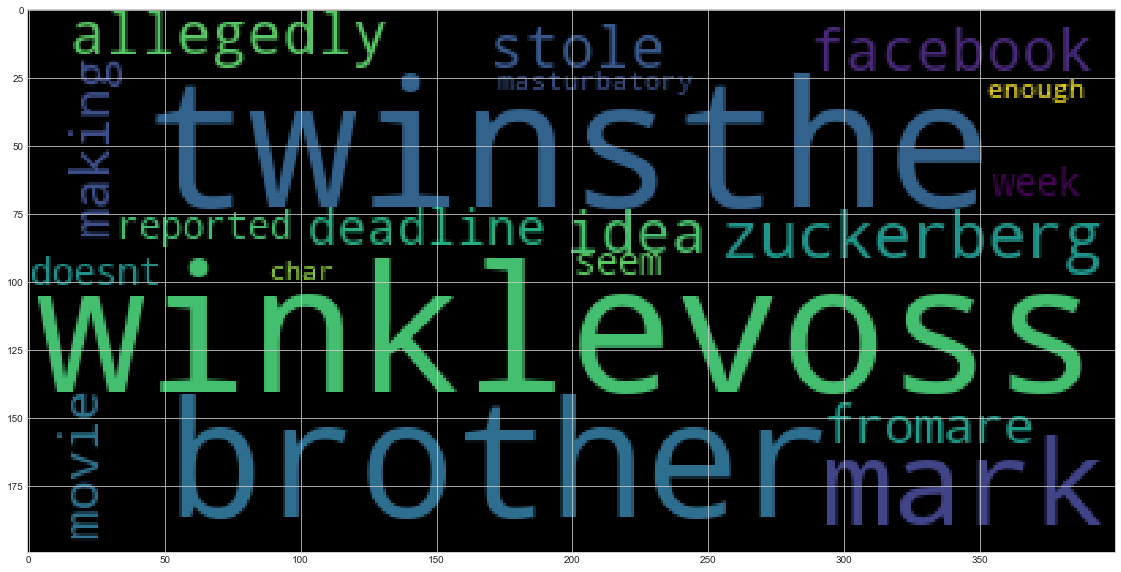

In [43]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(btc_text)
plt.imshow(wc)

In [44]:
ethereum_text = ethereum["text"].apply(tokenizer).values[0]
ethereum_text = ",".join(ethereum_text)
ethereum_text

'editor,note,andreessen,horowitzscrypto,startup,school,brought,together,45,participant,around,u,overseas,sevenweek,course,learn,build,crypto,company,andreessen,ho,3009,char'

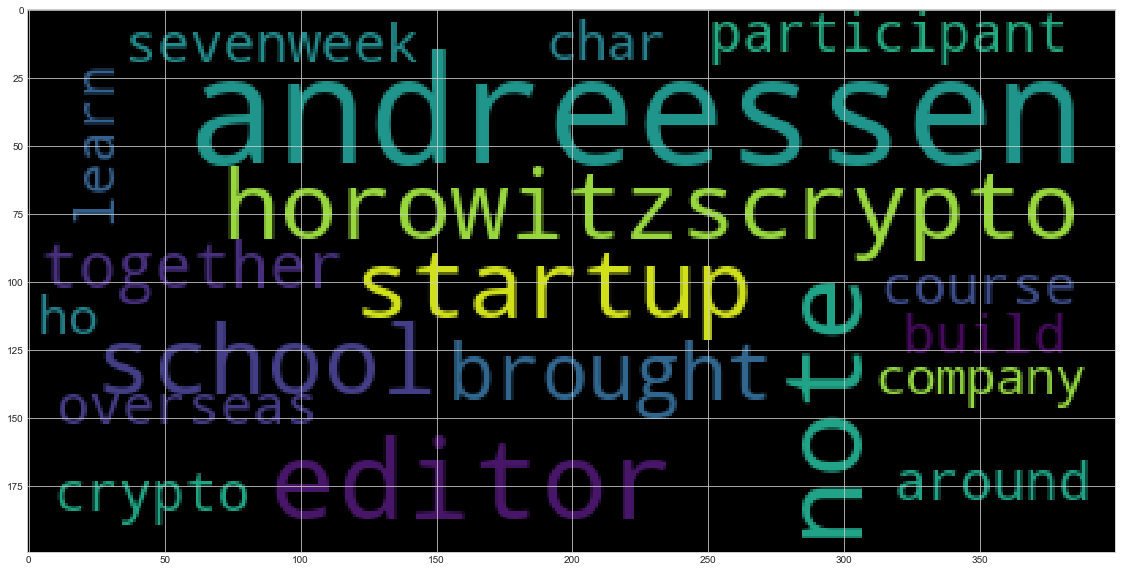

In [45]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [46]:
import spacy
from spacy import displacy

In [47]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [48]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [49]:
# Concatenate all of the bitcoin text together
btc.text.str.cat()

'The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars]If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars]Reuters\r\n<ul><li>Goldman Sachs gave five reasons why it thinks bitcoin is "not an asset class" nor "a suitable investment" in a presentation Wednesday morning.</li><li>Goldman observed that the crypt… [+3412 chars]<ul><li>Famed investor Michael Novogratz tweeted on Monday that bitcoin will soon take out the $10,000 resistance level, telling his followers, "Get on the train."</li><li>Novogratz said that turmoil… [+2757 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Sat

In [50]:
# Run the NER processor on all of the text
doc = nlp(btc.text.str.cat())

# Add a title to the document
doc.user_data["title"] ="Bitcoin NER"

In [51]:
# Render the visualization
displacy.render(doc, style='ent')

In [52]:
# List all Entities
entities = [ent.text for ent in doc.ents if ent.label_ ]
entities

['Mark Zuckerberg',
 'Facebook',
 'Deadline',
 'this week',
 'Goldman Sachs',
 'five',
 'bitcoin',
 'Wednesday',
 'Goldman',
 'Michael Novogratz',
 'Monday',
 'bitcoin',
 '$10,000 resistance',
 'Novogratz',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 '+3041',
 '2020',
 'a big year',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin'

---

## Ethereum NER

In [53]:
# Concatenate all of the bitcoin text together
ethereum.text.str.cat()

'Editor’s note:Andreessen HorowitzsCrypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+3009 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3095 chars]Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars]For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.\r\nMagic, a… [+2450 chars]Akron, Ohio, the hometown of LeBron James and the seat of the US tire industry; the one hundred and twenty seventh largest city in the US; 

In [54]:
# Run the NER processor on all of the text
doc = nlp(ethereum.text.str.cat())

# Add a title to the document
doc.user_data["title"] ="Ethereum NER"

In [55]:
# Render the visualization
displacy.render(doc, style='ent')

In [56]:
# List all Entities
entities = [ent.text for ent in doc.ents if ent.label_ ]
entities

['Andreessen HorowitzsCrypto Startup School',
 '45',
 'U.S.',
 'seven-week',
 'Andreessen Ho',
 '+3009',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Andreessen Horowitzs Crypto Startup School',
 '45',
 'U.S.',
 'seven-week',
 'Andreessen Ho',
 'Ohio',
 'LeBron James',
 'US',
 'the one hundred and twenty seventh',
 'US',
 'America',
 'first',
 'The Linux Foundation',
 'Drupal Foundation',
 'OSI',
 '133',
 '$2.5 million',
 '$2.5 million',
 'Wednesday',
 'morning',
 'March',
 '1500',
 'well over a hundred',
 'the Mozilla Builders Incubator',
 'more than £30,000',
 'Bitcoin',
 'Litecoin and Ethereum',
 'Mark Andrews',
 'St Helens',
 'England',
 'Liverpool Crown C',
 '+2411',
 'CrossTalk',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Today',
 'Satoshi Nakaboto',
 'Bitcoi